<a href="https://colab.research.google.com/github/thisisSHAX/ML_Ops_Project-/blob/main/Autism_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=16Pd-BdhzNMzPqPWD6XEu_XFZaGrSqFUz')

In [3]:
df.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [4]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

### Feature Set Selection

In [6]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

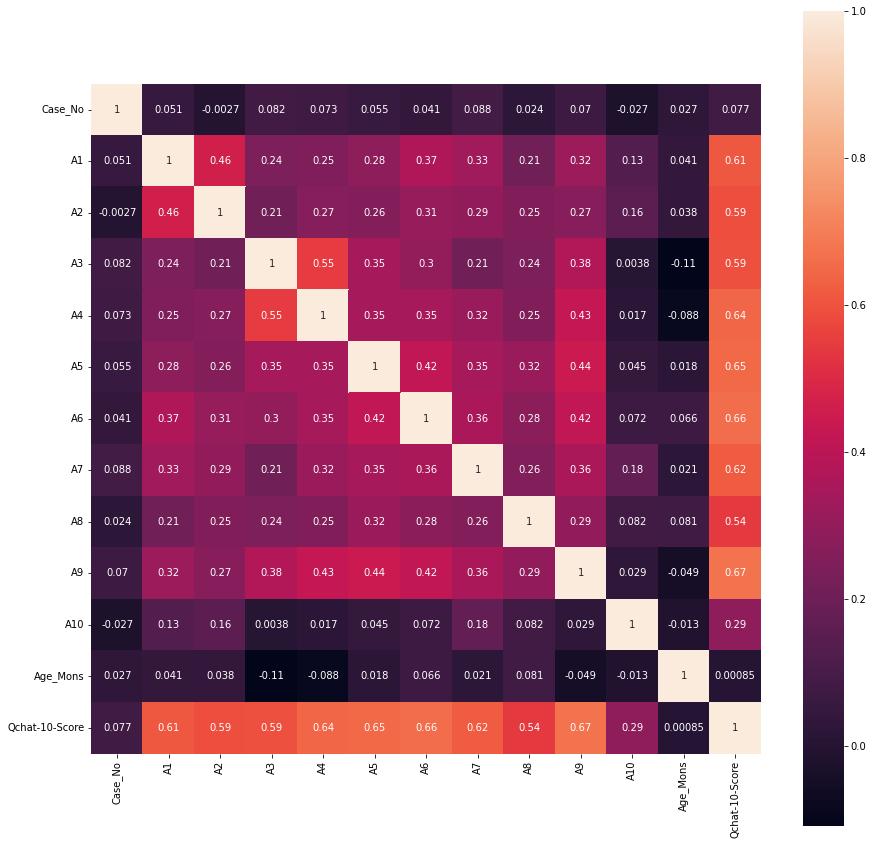

In [7]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

Qchat-10-Score has high correlation with A1 to A9. Hence, we can drop this feature

In [8]:
x_columns = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Age_Mons','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [9]:
cat_features = ['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','Sex','Ethnicity','Jaundice','Family_mem_with_ASD']

In [10]:
num_features = list(set(x_columns) - set(cat_features))

In [11]:
num_features

['Age_Mons']

In [12]:
df[x_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Sex                  1054 non-null   object
 12  Ethnicity            1054 non-null   object
 13  Jaundice             1054 non-null   object
 14  Family_mem_with_ASD  1054 non-null   object
dtypes: int64(11), object(4)
memory usage: 123.6+ KB


### Encode Categorical Variables

In [13]:
#encoded_df = pd.get_dummies(df[x_columns], columns=cat_features)
encoded_df = pd.get_dummies(df[x_columns], columns=cat_features, drop_first = True)

In [14]:
encoded_df.sample(5)

,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
958,36,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
939,20,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
818,19,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
920,27,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1
252,36,0,0,0,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [15]:
x_features = list(encoded_df.columns)

In [16]:
encoded_df.shape

(1054, 24)

### Data Splitting

In [17]:
X = encoded_df

In [21]:
Y = pd.get_dummies(df['Class/ASD Traits '], drop_first=True)

In [22]:
X

,Age_Mons,A1_1,A2_1,A3_1,A4_1,A5_1,A6_1,A7_1,A8_1,A9_1,A10_1,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
0,28,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,36,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
2,36,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0
3,24,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,24,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1050,12,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
1051,18,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
1052,19,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1


In [23]:
Y

,Yes
0,0
1,1
2,1
3,1
4,1
...,...
1049,0
1050,1
1051,1
1052,0


In [25]:
#Checking imbalance
Y.sum()/len(Y)

Yes    0.690702
dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_prod, Y_train, Y_prod = train_test_split(X_train, Y_train, test_size=0.25, random_state=2) # 0.25 x 0.8 = 0.2

In [28]:
X_train.shape

(632, 24)

In [29]:
X_test.shape

(211, 24)

In [30]:
X_prod.shape

(211, 24)

## Modelling

### Logistic Regression

In [33]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter= 10000)

# fit the model with data
logreg.fit(X_train,Y_train)

#
Y_pred=logreg.predict(X_prod)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 257.44, 'Predicted label')

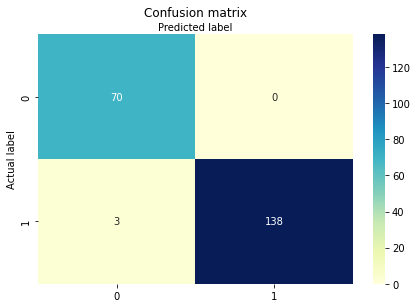

In [34]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_prod, Y_pred)

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
print("Accuracy:",metrics.accuracy_score(Y_prod, Y_pred))
print("Precision:",metrics.precision_score(Y_prod, Y_pred))
print("Recall:",metrics.recall_score(Y_prod, Y_pred))

Accuracy: 0.985781990521327
Precision: 1.0
Recall: 0.9787234042553191


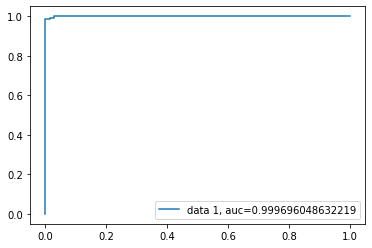

In [36]:
Y_pred_proba = logreg.predict_proba(X_prod)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_prod,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_prod, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### KNN

In [37]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(X_train, Y_train)

#Predict the response for production dataset
Y_pred = knn.predict(X_prod)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Text(0.5, 257.44, 'Predicted label')

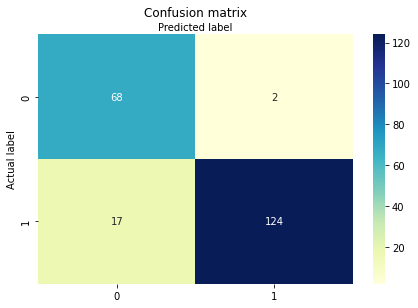

In [38]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_prod, Y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print("Accuracy:",metrics.accuracy_score(Y_prod, Y_pred))
print("Precision:",metrics.precision_score(Y_prod, Y_pred))
print("Recall:",metrics.recall_score(Y_prod, Y_pred))

Accuracy: 0.909952606635071
Precision: 0.9841269841269841
Recall: 0.8794326241134752


### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
#Create Decision Tree
dt = DecisionTreeClassifier()

#Train the model using the training sets
dt.fit(X_train, Y_train)

#Predict the response for production dataset
Y_pred = dt.predict(X_prod)

Text(0.5, 257.44, 'Predicted label')

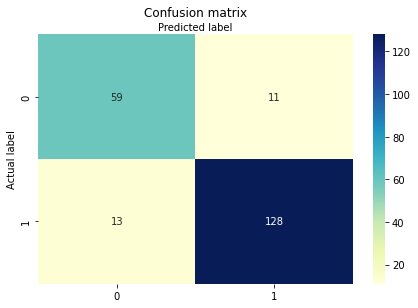

In [41]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(Y_prod, Y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
print("Accuracy:",metrics.accuracy_score(Y_prod, Y_pred))
print("Precision:",metrics.precision_score(Y_prod, Y_pred))
print("Recall:",metrics.recall_score(Y_prod, Y_pred))

Accuracy: 0.8862559241706162
Precision: 0.920863309352518
Recall: 0.9078014184397163


In [49]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

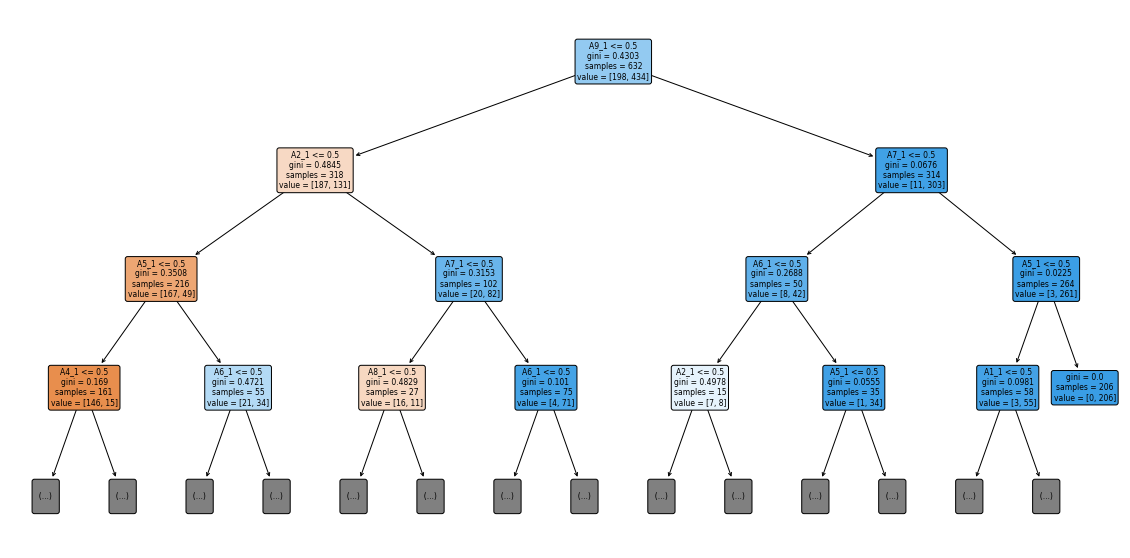

In [50]:
from sklearn.tree import plot_tree
dec_tree = plot_tree(decision_tree=dt, feature_names = X.columns, filled = True , max_depth = 3, precision = 4, rounded = True)

### Creating Other File Formats

In [ ]:
import os

In [ ]:
X_train.to_csv("./sample_data/train.csv")

In [ ]:
X_train.to_pickle("./sample_data/train.pkl")

In [ ]:
ls -al sample_data

total 55628
drwxr-xr-x 1 root root     4096 Nov  9 17:32  ./
drwxr-xr-x 1 root root     4096 Nov  9 17:31  ../
-rwxr-xr-x 1 root root     1697 Jan  1  2000  anscombe.json*
-rw-r--r-- 1 root root   301141 Nov  1 13:35  california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Nov  1 13:35  california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Nov  1 13:35  mnist_test.csv
-rw-r--r-- 1 root root 36523880 Nov  1 13:35  mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000  README.md*
-rw-r--r-- 1 root root    70146 Nov  9 16:34 'Toddler Autism dataset July 2018.csv'
-rw-r--r-- 1 root root    34893 Nov  9 17:32  train.pkl


In [ ]:
X_train.to_parquet("./sample_data/train.parquet")

In [ ]:
filenames = ['./sample_data/train.pkl', 
             './sample_data/train.parquet',
             './sample_data/train.csv']

all_filesizes = [os.path.getsize(f) for f in filenames]             
 
filescompare_df = pd.DataFrame( { "formats" : filenames,
                                  "filesize": all_filesizes})

In [ ]:
filescompare_df

,formats,filesize
0,./sample_data/train.pkl,34893
1,./sample_data/train.parquet,30942
2,./sample_data/train.csv,51577


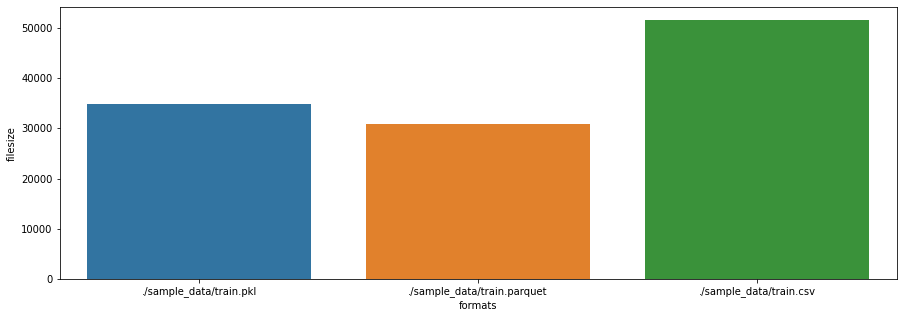

In [ ]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare_df,
           x = 'formats',
           y = 'filesize');

# Read time benchmarking of different formats

In [ ]:
%%time 

train_pkl_df = pd.read_pickle("./sample_data/train.pkl")

CPU times: user 2.35 ms, sys: 966 µs, total: 3.31 ms
Wall time: 4.14 ms


In [ ]:
%%time 

train_parquet_df = pd.read_parquet("./sample_data/train.parquet")

CPU times: user 9.93 ms, sys: 915 µs, total: 10.8 ms
Wall time: 11.9 ms


In [ ]:
%%time 

train_csv_df = pd.read_csv("./sample_data/train.csv")

CPU times: user 8.52 ms, sys: 0 ns, total: 8.52 ms
Wall time: 9.43 ms


In [ ]:
import time

t1 = time.perf_counter()
train_df = pd.read_csv("./sample_data/train.csv")
time_csv = time.perf_counter() - t1

t1 = time.perf_counter()
train_pkl_df = pd.read_pickle("./sample_data/train.pkl")
time_pkl = time.perf_counter() - t1

t1 = time.perf_counter()
train_parquet_df = pd.read_parquet("./sample_data/train.parquet")
time_parquet = time.perf_counter() - t1

In [ ]:
filescompare_df['read_time'] = [time_csv, time_pkl, time_parquet]

In [ ]:
filescompare_df

,formats,filesize,read_time
0,./sample_data/train.pkl,34893,0.011322
1,./sample_data/train.parquet,30942,0.001182
2,./sample_data/train.csv,51577,0.007688


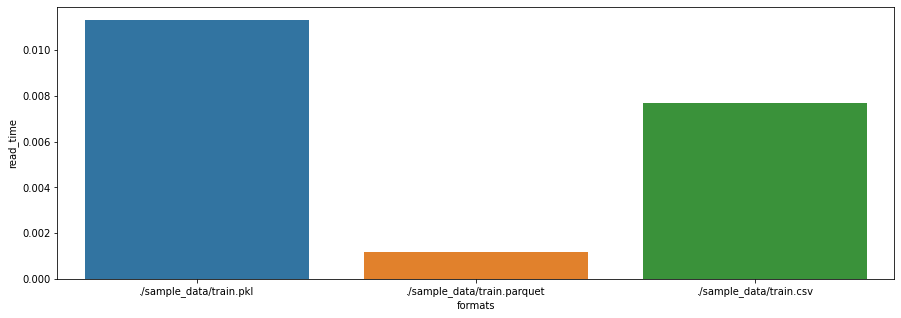

In [ ]:
plt.figure( figsize = (15, 5) )
sns.barplot( data = filescompare_df,
           x = 'formats',
           y = 'read_time');